# Introduction to Image Processing

Mojdeh Rastgoo - Desire Sidibe

# 4. Spatial Filtering and de-noising

Importing the necessary libraries an modules.

In [117]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color 
from skimage import filters
from skimage import morphology

# import the function to add some noise
from skimage.util import random_noise


## 4.1 Smoothing

### 4.1.1 Mean filter 
**Q.1** Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 3, 5, 7$
show your results, remember to add title to your images. 

Use [`skimage.filters.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

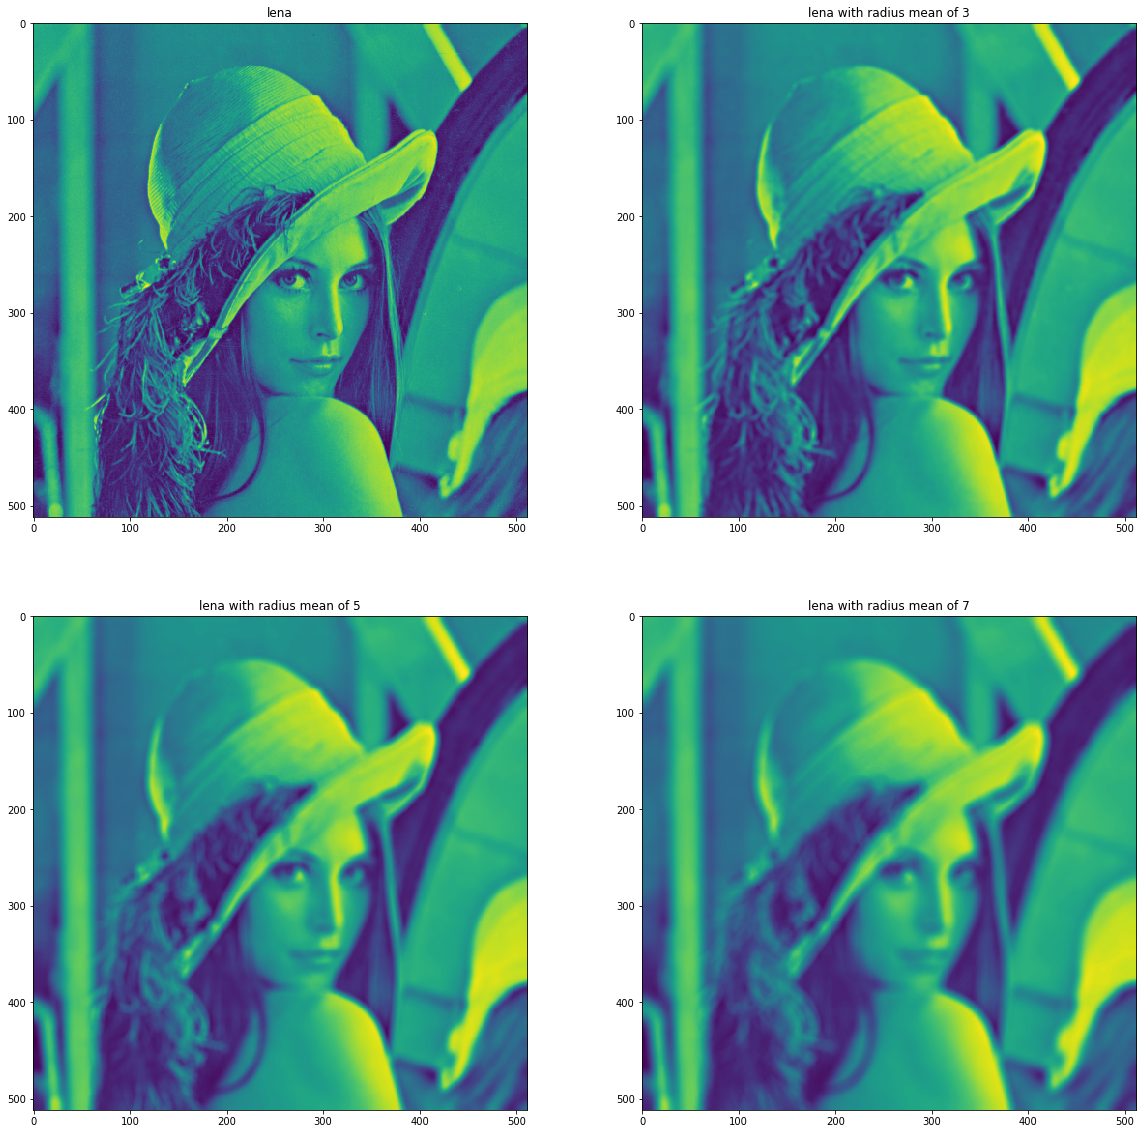

In [61]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

lena = io.imread('./images/lena-grey.bmp',as_grey = True)
lenaF = img_as_float(lena)

lenat = filters.rank.mean(lena, morphology.disk(3))
lenaf = filters.rank.mean(lena, morphology.disk(5))
lenas = filters.rank.mean(lena, morphology.disk(7))

ax[0].imshow(lenaF)
ax[0].set_title('lena')

ax[1].imshow(lenat)
ax[1].set_title('lena with radius mean of 3')

ax[2].imshow(lenaf)
ax[2].set_title('lena with radius mean of 5')

ax[3].imshow(lenas)
ax[3].set_title('lena with radius mean of 7')


### 4.1.2 Filtering using convolution 
**Q.2** Once again apply the mean fiter, howver instead of using `filters.rank` make your mean mask having the same size as the last filter you applied in the previous question (disk of 7) and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

In [66]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))
ax = axes.ravel()

from scipy import *

mask_mean = np.ones((14,14), dtype=float)
mask_mean /= np.sum(np.sum(mask_mean))

lena = io.imread('./images/lena-grey.bmp',as_grey = True)
lenaF = img_as_float(lena)

lenaC = ndimage.filters.convolve(lena, mask_mean)


ax[0].imshow(lenaF)
ax[0].set_title('lena')
ax[1].imshow(lenaC)
ax[1].set_title('lena convolve')


Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

## 4.2 Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters are already implemented in `skimage` and can be directly used without applying the previous processing.

check the modules `filters` and `filters.rank` for more information.

In [68]:
from skimage import filters
filters??

### 4.2.1 First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator is an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Q.3** Apply `roberts`, `prewitt`, `sobel` and `scharr` filters on Leaves image (`leaves.jpg`).

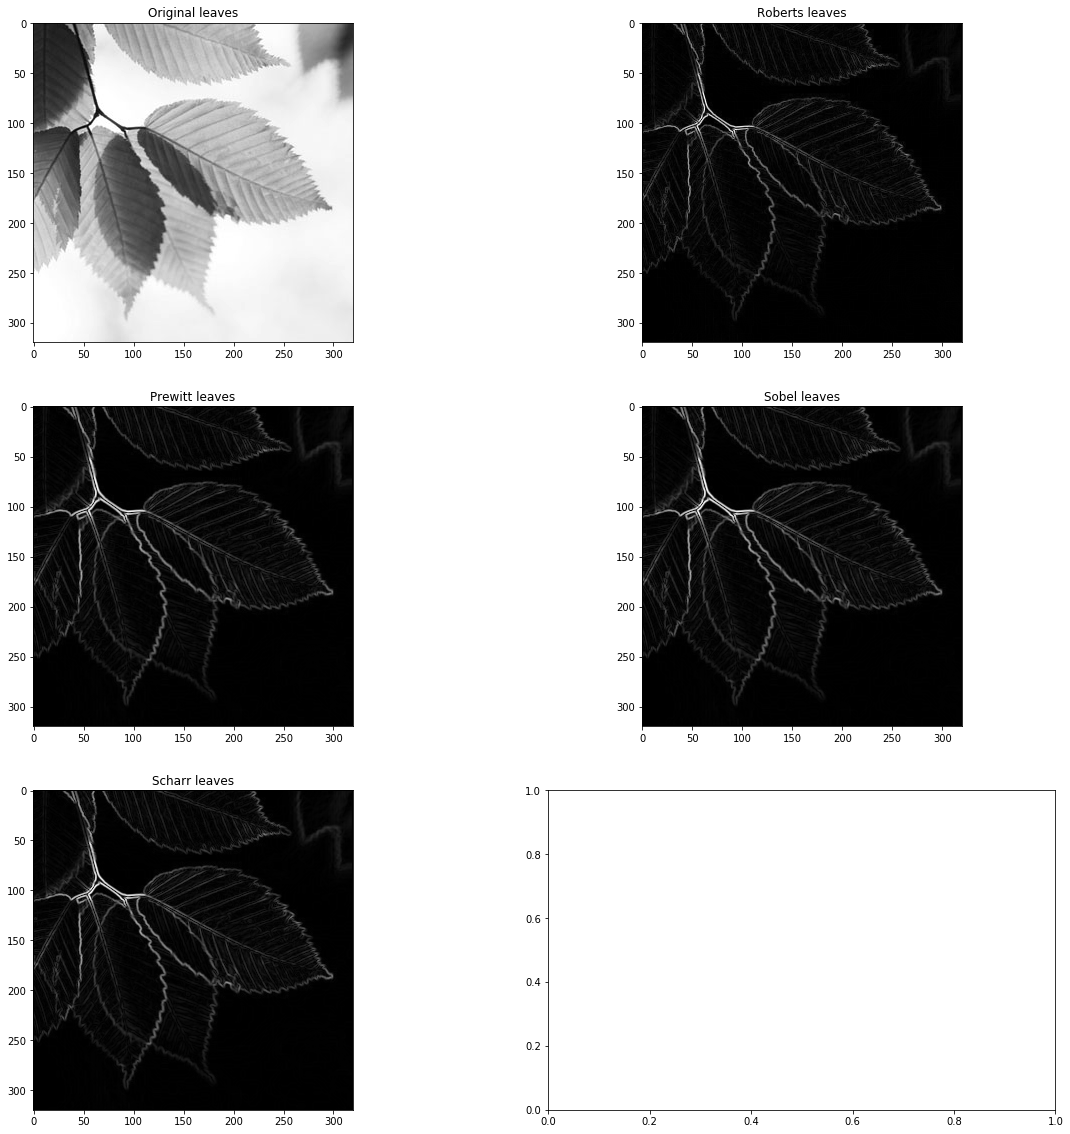

In [84]:
f, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20,20))
ax = axes.ravel()

leaves = io.imread('./images/leaves.jpg',as_grey = True)
leavesF = img_as_float(leaves)

LeavesRoberts = filters.roberts(leavesF)
LeavesPrewitt = filters.prewitt(leavesF)
LeavesSobel = filters.sobel(leavesF)
LeavesScharr = filters.scharr(leavesF)

ax[0].imshow(leavesF, cmap = cm.gray)
ax[0].set_title('Original leaves')

ax[1].imshow(LeavesRoberts, cmap = cm.gray)
ax[1].set_title('Roberts leaves')

ax[2].imshow(LeavesPrewitt, cmap = cm.gray)
ax[2].set_title('Prewitt leaves')

ax[3].imshow(LeavesSobel, cmap = cm.gray)
ax[3].set_title('Sobel leaves')

ax[4].imshow(LeavesScharr, cmap = cm.gray)
ax[4].set_title('Scharr leaves')

**Q.4** Implement sobel filters using convolution operation.
Reminder, sobels operators in horizontal and vertical are as follows.

$$S_x = \begin{bmatrix}1& 0 & -1\\ 2 & 0 & -2 \\ 1 & 0 & -1\end{bmatrix}, \qquad S_y = \begin{bmatrix}1& 2 & 1\\ 0 & 0 & 0 \\ -1 & -2 & -1\end{bmatrix}$$

and then show the magnitude and angle image obtained from the filter 

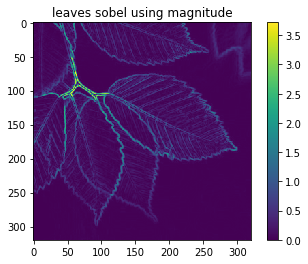

In [152]:
leaves = io.imread('./images/leaves.jpg',as_grey = True)
leavesF = img_as_float(leaves)

s1 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
s2 = s1.T

leavesS = ndimage.filters.convolve(leaves, s1)
leavesST = ndimage.filters.convolve(leaves, s2)

leaves_magnitude = sqrt(leavesS**2 + leavesST**2)
leaves_angle = np.arctan2(leavesS, leavesST)

plt.imshow(leaves_magnitude)
plt.colorbar()
plt.title('leaves sobel using magnitude')
plt.show()

plt.imshow(leaves_angle)
plt.colorbar()
plt.title('leaves sobel using angle')
plt.show()


### 4.2.2 Second-order edge detector (Laplace filter)

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does provides an implementation of this filter in `filters.laplace` modules. 

**Q.4** Apply this filter on the Leaves image.

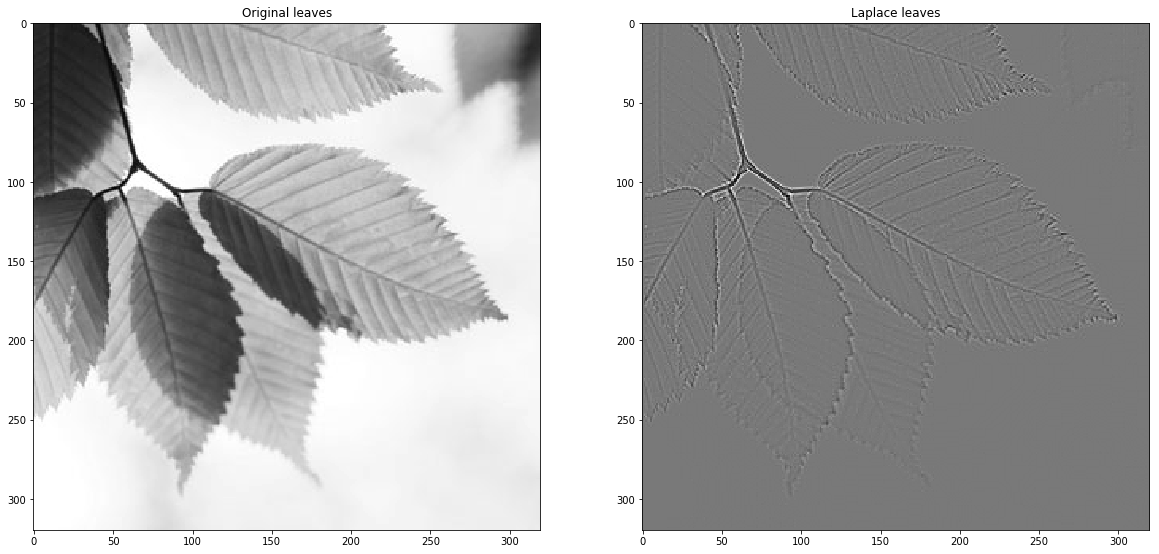

In [126]:
f, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,20))
ax = axes.ravel()

leaves = io.imread('./images/leaves.jpg',as_grey = True)
leavesF = img_as_float(leaves)

LeavesLaplace = filters.laplace(leavesF)

ax[0].imshow(leavesF, cmap = cm.gray)
ax[0].set_title('Original leaves')

ax[1].imshow(LeavesLaplace, cmap = cm.gray)
ax[1].set_title('Laplace leaves')


### 4.2.3 Angular edge detector (Gabor filter)

In the previous section, edges are detected using the response of two kernels (i.e., horizontal and vertical kernels) which are later combined (i.e., magnitude and angle). 

Gabor filters is a family of filters which are sensitive to a specific angle and a specific frequency.
Gabor filter is defined by a sinusoidal wave multiplied by a guassian, the complex form of this filter is presented bellow :

$$g(x,y;\lambda,\theta,\psi,\sigma,\gamma) = \exp\left(-\frac{x'^2+\gamma^2y'^2}{2\sigma^2}\right)\exp\left(i\left(2\pi\frac{x'}{\lambda}+\psi\right)\right)$$

where 
$$
{\displaystyle x'=x\cos \theta +y\sin \theta \,}$$
and
$$
{\displaystyle y'=-x\sin \theta +y\cos \theta \,} $$
`Skimage` provides an implementation of gabor filtering in [`filters.gabor`](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gabor)


**Q.5 **Apply this filter to find the edges at 60 degrees in Lena image. Try with different frequencies in the range [0.05, 0.5].

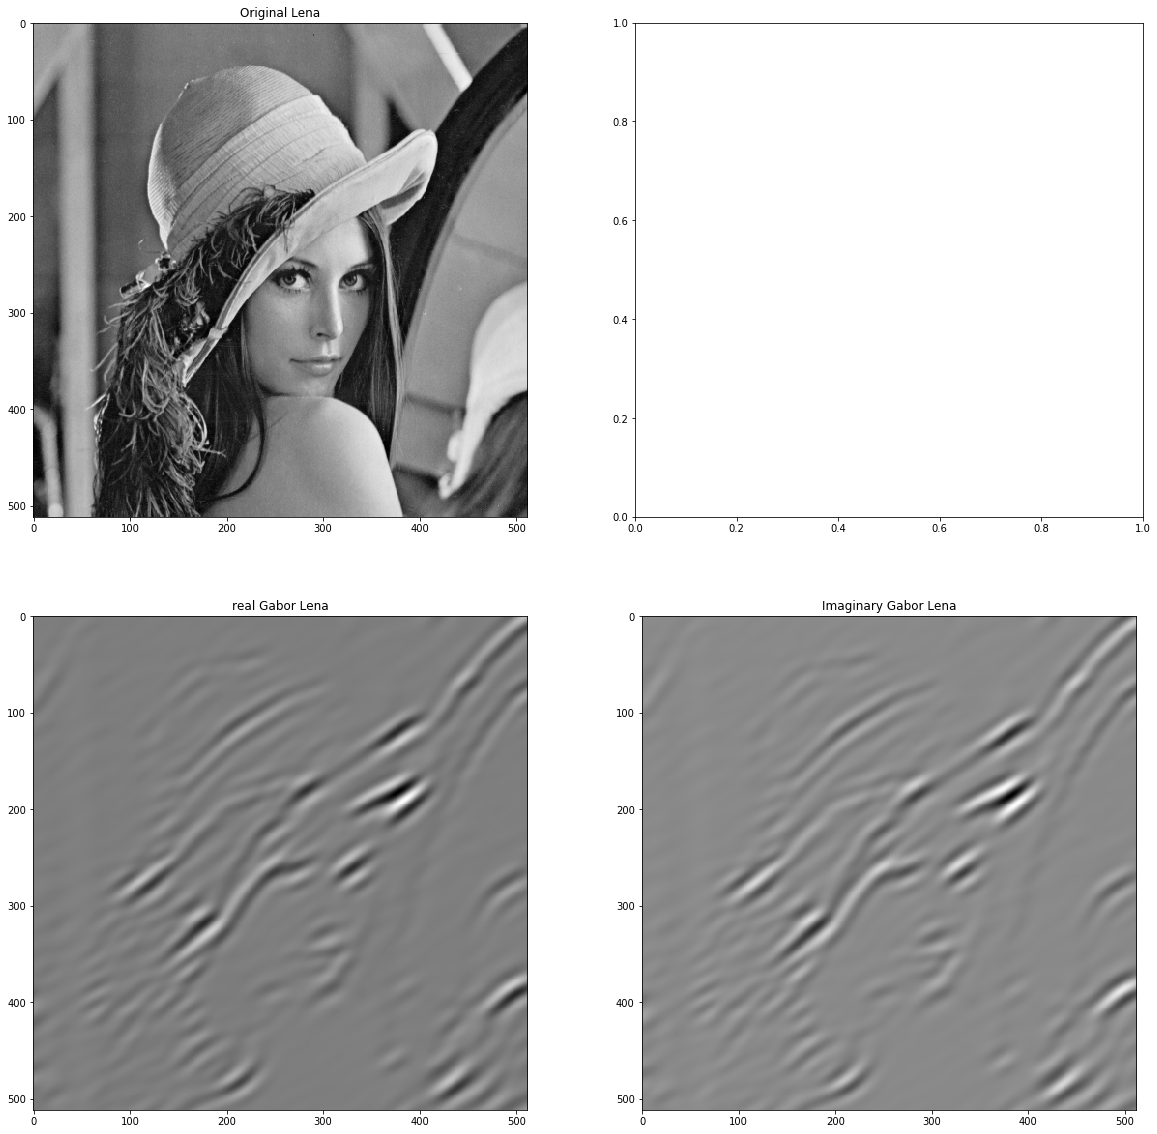

In [160]:
f, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))
ax = axes.ravel()

Lena = io.imread('./images/lena-grey.bmp',as_grey = True)
LenaF = img_as_float(Lena)

LenaGabor1, LenaGabor2 = filters.gabor(LenaF, frequency = 0.05 , theta = pi/3)

ax[0].imshow(LenaF, cmap = cm.gray)
ax[0].set_title('Original Lena')

ax[2].imshow(LenaGabor1, cmap = cm.gray)
ax[2].set_title('real Gabor Lena')

ax[3].imshow(LenaGabor2, cmap = cm.gray)
ax[3].set_title('Imaginary Gabor Lena')

## 4.3 Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function [`util.random_noise`](http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise).

**Q.6 ** Generate several corrupted Lena images with `gaussian` noise, `salt & peppers` noise, and `speckle` noise. Keep the default parameters.

In [36]:
from skimage import util

**Q.7** Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** Q.7.1 mean filter: **

** Q.7.2 alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

** Q.7.3 median filter: **

## 4.4 Sharpening

**Q.8** Use the `railway` image and sharpen the image using laplacian fitering.

## 4.5 Hough transform

** Q.9 ** Define your Hough_trans function which finds the lines within an image

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` or `cv2.canny` edge detector to find the primary edges**